In [1]:
import os
import sys
import fitsio
import numpy             as np
import pylab             as pl
import matplotlib.pyplot as plt
import astropy.io.fits   as fits

In [2]:
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [3]:
import pubplot

from schechter     import schechter, named_schechter
from gama_limits   import gama_field
from delta8_limits import d8_limits, delta8_tier
from findfile      import findfile, fetch_fields
from lumfn         import multifield_lumfn
from astropy.table import Table

In [4]:
n8 = Table.read(findfile(ftype='ddp_n8'))
n8

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,JK,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX,DDP [3],DDPZLIMS [3],WEIGHT_STEPWISE,RANDSEP,RANDMATCH,BOUND_DIST,FILLFACTOR,FILLFACTOR_VMAX,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP1_DELTA8_TIER
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,bytes4,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,int64,int64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,int64
288621,587726031711436977,179.41627928,1.71208862,17.3157,0.13277,5,581042451096037376,6,19.773409,18.034101,17.076195,16.652433,16.325073,0.13277,439.2643013153569,38.21362954954168,G12,2,0,-387.5856482778007,3.948800475419198,11.585722521685781,387.5502284920165,-7.204250685231389,11.197138487908651,0.9579067,17.3157,JK4,0.878030981843461,0,6,-0.06324298047175976,0.016632760707240193,0.1642179283310073,0.3830584275878262,0.739066223765642,0.8,-0.1287869,-0.106216006,-20.933360040266827,-20.955930940885857,-21.062146946866825,38.249060571272686,38.377847477872685,38.271631471891716,-0.08103826841576539,-0.029374659730680805,0.13568660994643572,0.23580062998298246,-20.904828721882257,2.4842987,0.3469483866220922,0.0,-5.3157005,0.012846574216225476,0.0,16548178.286255283,1 .. 0,1 .. 0,3.237251617236048,0.47971972915158717,836604,2.030334515044263,0.6916012686028452,0.7758223046651161,37,67,0,3.182827988435945,7
601151,588848900431414202,138.6404053,0.33619705,19.61242,0.24889,4,G09_Y3_019_029,5,22.52058,20.802828,19.480701,19.037682,18.777788,0.24889,885.8186930960275,39.736724203986164,G9,0,0,-532.3638468967504,468.6750535606513,4.161878636350656,528.4122603501949,-473.1301975819554,3.6320509670826913,1.3221264,19.61242,JK2,0.9003573592313386,0,6,0.088070534245319,0.5098395635637849,0.315126173229765,0.8843833124452495,0.7528692493343202,0.8,-0.24142331,-0.199112,-20.198007939948624,-20.24031925071675,-20.43943124879796,39.81042706836659,40.05185037721593,39.85273837913472,-0.02016168607028883,0.2824340342269912,0.19656319229191227,0.5476093239406545,-20.07944495901077,0.18758011,0.267142738996717,0.0,-7.612419,0.009274542025754265,0.0,7968167.123712554,0 .. 0,1 .. 0,8.627247871084124,0.7280753263548283,142531,29.002604752704357,1.0,0.7758223046651161,20,0,0,0.5637022395404254,4
619434,588848900466999556,219.9359482,0.41395985,18.043674,0.16371,4,G15_Y1_GS2_296,6,22.007706,19.332598,18.042555,17.586708,17.84233,0.16371,552.8707479549668,38.713118061487705,G15,0,0,-364.274190939393,-304.96903773090276,3.432500876439229,366.8262351372592,301.89849800432836,3.06469233099681,1.2900429,18.043674,JK8,1.1019944992003872,0,7,-0.006744240445307789,0.18130413755157077,0.23433605586740264,0.5896463908414714,0.9347325422231969,0.8,-0.15879871,-0.130968,-20.74498093884921,-20.772811643895864,-20.903779648360967,38.78865540784335,38.94745411735511,38.816486112890004,-0.06342617223181496,0.047718681669949914,0.15329870613038615,0.3128939713836132,-20.663943589112193,1.7563248,0.3160450073261742,0.0,-6.0436745,0.01182054663

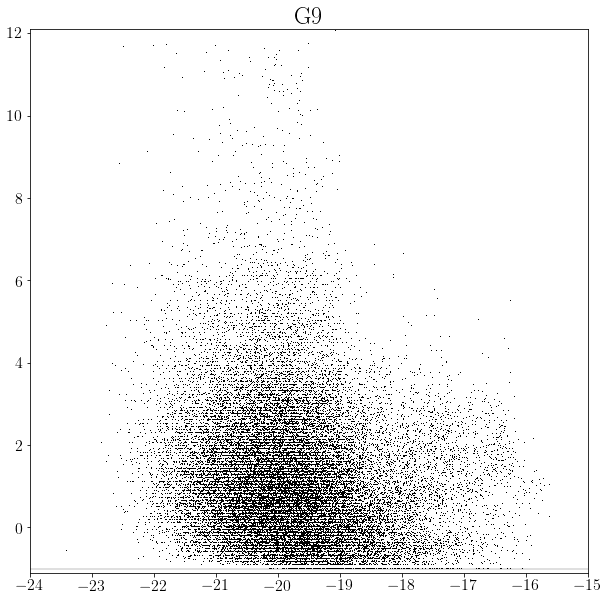

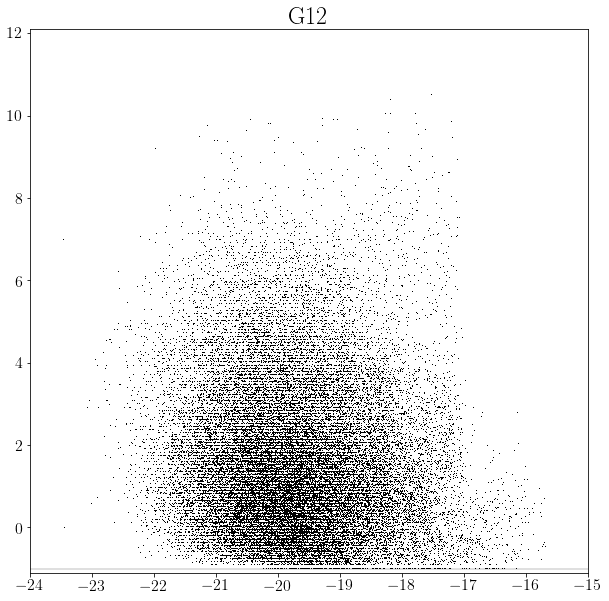

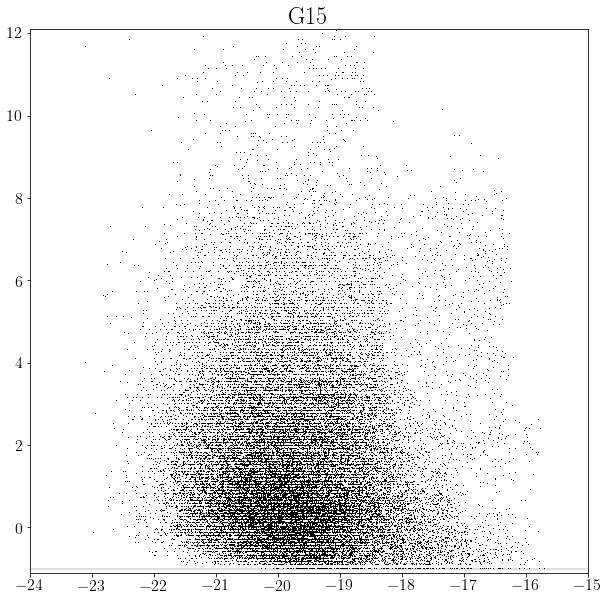

In [14]:

for field in ['G9', 'G12', 'G15']:
    isin = n8['FIELD'] == field

    fig, ax = plt.subplots(1,1,figsize=(10,10))
    
    pl.sca(ax)
    pl.clf()
    pl.axhline(-1., c='k', lw=0.25)
    pl.plot(n8['MCOLOR_0P0'][isin], n8['DDP1_DELTA8'][isin], marker=',', lw=0.0, c='k')
    pl.xlim(-24., -15.)
    pl.ylim(-1.1, 12.1)
    pl.title(field)
    pl.show()

# Done.